In [1]:
import math as m
import random as rm
import numpy as np

import scipy.stats as stats

from data_generator import *
from local_randomizer import *
from sliding_window import *
from metric import *
from DQN import *

In [2]:
itemset_len = 1000
k = 100

user_num = 50000
data_len = 10

omega = 5
epsilon = 5

total_step = 10

100%|██████████| 50000/50000 [00:04<00:00, 11553.78it/s]


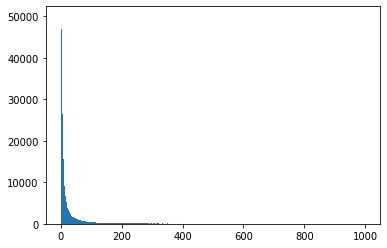

100%|██████████| 50000/50000 [00:04<00:00, 11535.48it/s]
0.33908532505424416 1.5443043875917526 71


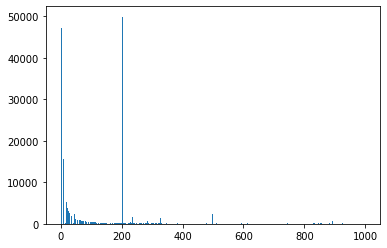

100%|██████████| 50000/50000 [00:04<00:00, 11441.40it/s]
0.6208955199484929 2.987023165394464 42


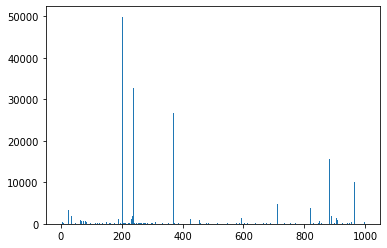

100%|██████████| 50000/50000 [00:04<00:00, 11506.61it/s]
0.2306978970644308 0.7193627417090012 80


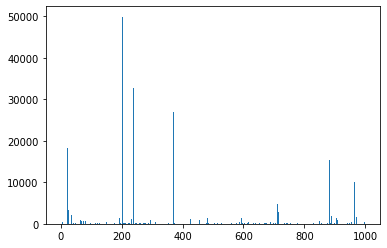

100%|██████████| 50000/50000 [00:04<00:00, 11596.79it/s]
0.520921715016075 2.343105711339877 57


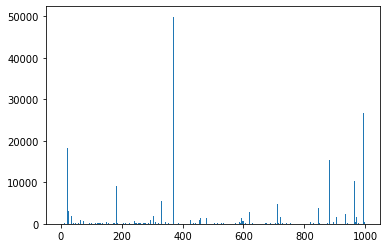

100%|██████████| 50000/50000 [00:04<00:00, 11546.58it/s]
0.4280326730259459 3.3226049178698043 53


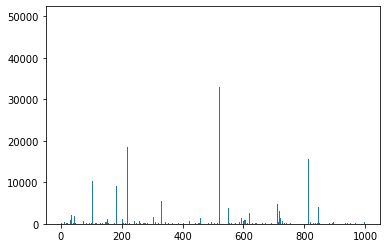

100%|██████████| 50000/50000 [00:04<00:00, 11502.56it/s]
0.6692804838494887 3.488194387868777 42


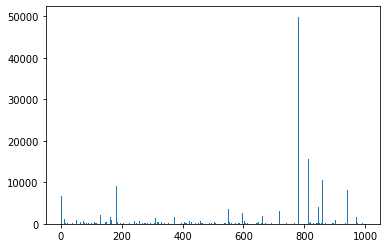

100%|██████████| 50000/50000 [00:04<00:00, 11511.03it/s]
0.19412927942012922 0.9275797324043936 81


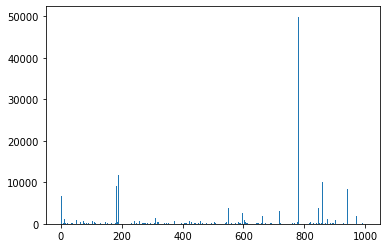

100%|██████████| 50000/50000 [00:04<00:00, 11582.10it/s]
0.04133288147780109 0.1957512281084512 91


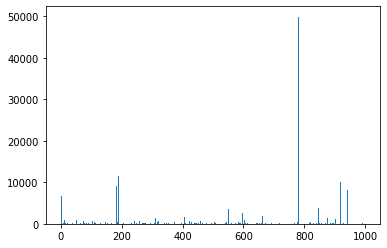

100%|██████████| 50000/50000 [00:04<00:00, 11538.02it/s]
0.2885183967156553 0.8024982367896241 71


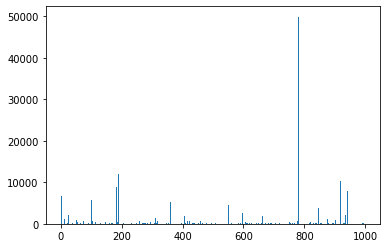

100%|██████████| 50000/50000 [00:04<00:00, 11506.34it/s]
0.4868822207795003 2.8981034899014713 57


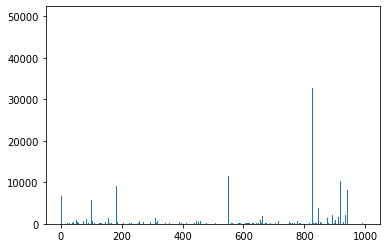

In [5]:
generator = ZipfGenerator(itemset_len, user_num, data_len)
generator.enable_render()
data = generator.generate()
counts = calc_counts(data, itemset_len)
plt.hist(data.flatten(), bins=np.arange(1001))
plt.show()
for _ in range(10):
    generator.transit()
    data = generator.generate()
    new_counts = calc_counts(data, itemset_len)
    print(generator.r, stats.entropy(counts, new_counts), len(np.intersect1d(calc_top_k(counts, k), calc_top_k(new_counts, k))))
    counts = new_counts
    plt.hist(data.flatten(), bins=np.arange(1001))
    plt.show()

In [39]:
lower, upper = 0, 1
randomizer = Harmony(0.1, lower, upper)
data = np.clip(np.random.normal(0.2, 0.01, 50000), lower, upper)
private_data = randomizer.randomize_group(data)
estimate = randomizer.aggregate(private_data)
print(estimate, data.mean(), private_data.mean())

0.2185657057129257 0.1999740401610903 0.48594


In [1]:
mu, sigma = 0.1, 0.3
X = stats.truncnorm(-mu/sigma, (1 - mu)/sigma, loc=mu, scale=sigma)

a = plt.hist(X.rvs(100000), 100)
plt.show()

NameError: name 'stats' is not defined

In [9]:
import numpy as np
import scipy.stats

# 随机生成两个离散型分布
x = [np.random.randint(1, 11) for i in range(10)]
print(x)
print(np.sum(x))
px = x / np.sum(x)
print(px)
y = [np.random.randint(1, 11) for i in range(10)]
print(y)
print(np.sum(y))
py = y / np.sum(y)
print(py)

# 利用scipy API进行计算
# scipy计算函数可以处理非归一化情况，因此这里使用
# scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可
KL = scipy.stats.entropy(np.ones(10), y) 
print(KL)

# 编程实现
KL = 0.0
for i in range(10):
    KL += px[i] * np.log(px[i] / py[i])
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print(KL)

[2, 4, 5, 5, 6, 7, 6, 3, 6, 6]
50
[0.04 0.08 0.1  0.1  0.12 0.14 0.12 0.06 0.12 0.12]
[2, 2, 7, 2, 5, 8, 2, 2, 10, 4]
44
[0.04545455 0.04545455 0.15909091 0.04545455 0.11363636 0.18181818
 0.04545455 0.04545455 0.22727273 0.09090909]
0.2026640449159243
0.13230256355577022


In [6]:
a = stats.binom(1, 0.5)

In [17]:
import pandas as pd

train=pd.read_csv('data/UCRArchive_2018/ElectricDevices/ElectricDevices_TRAIN.tsv', sep='\t')
test=pd.read_csv('data/UCRArchive_2018/ElectricDevices/ElectricDevices_TEST.tsv', sep='\t')
print(train.shape)
print(test.shape)
train

(8925, 97)
(7710, 97)


,1,-0.18610903,-0.18610903.1,-0.18610903.2,-0.18610903.3,-0.18610903.4,-0.18610903.5,-0.18610903.6,-0.18610903.7,-0.18610903.8,...,5.9902174,2.9127399,-0.18610903.80,-0.18610903.81,-0.18610903.82,-0.18610903.83,-0.18610903.84,-0.18610903.85,-0.18610903.86,-0.18610903.87
0,1,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,...,0.191506,6.476670,1.645078,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005,-0.177005
1,1,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,...,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535,-0.213535
2,1,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472,...,0.160882,0.180433,0.160882,7.355375,1.177495,-0.171472,-0.171472,-0.171472,-0.171472,-0.171472
3,1,-0.169266,-0.169266,-0.169266,-0.169266,-0.169266,-0.169266,-0.169266,-0.169266,-0.169266,...,0.190945,6.074392,0.170933,0.190945,0.190945,7.395165,0.851332,-0.169266,-0.169266,-0.169266
4,1,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863,...,0.169769,0.149845,0.109997,5.927797,3.676388,-0.188863,-0.188863,-0.188863,-0.188863,-0.188863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,5,-0.611983,-0.611983,-0.611983,-0.611983,-0.611983,-0.611983,-0.611983,-0.611983,-0.611983,...,1.794459,1.628497,1.711478,1.711478,1.711478,1.628497,-0.611983,-0.611983,-0.611983,-0.611983
8921,5,-0.498369,-0.498369,-0.498369,-0.498369,-0.498369,-0.498369,-0.498369,-0.498369,-0.498369,...,2.218906,2.315952,2.315952,2.218906,2.218906,1.733678,-0.498369,-0.498369,-0.498369,-0.498369
8922,5,-0.399394,-0.399394,-0.399394,-0.399394,-0.399394,-0.399394,-0.399394,-0.399394,-0.399394,...,2.646940,2.646940,2.646940,2.436848,2.646940,2.541894,0.440974,-0.399394,-0.399394,-0.399394
8923,5,-0.595599,-0.595599,-0.595599,-0.595599,-0.595599,-0.595599,-0.595599,-0.595599,-0.595599,...,1.959326,1.783125,1.783125,1.871226,1.783125,1.783125,1.783125,1.871226,1.871226,1.783125


In [4]:
from baseline import *
run_sample()

100%|██████████| 10000/10000 [00:00<00:00, 421089.49it/s]
STEP 1 :
Perturbating users' data...
hit_num MAE RE NDCG CHR oracle
19 0.08050317273478588 1.0362898964579577 0.16608428888650512 0.45086 0.88784
STEP 2 :
hit_num MAE RE NDCG CHR oracle
19 0.08050317273478588 1.0362898964579577 0.16608428888650512 0.45086 0.88784
STEP 3 :
hit_num MAE RE NDCG CHR oracle
19 0.08050317273478588 1.0362898964579577 0.16608428888650512 0.45086 0.88784
STEP 4 :
hit_num MAE RE NDCG CHR oracle
19 0.08050317273478588 1.0362898964579577 0.16608428888650512 0.45086 0.88784
STEP 5 :
100%|██████████| 10000/10000 [00:00<00:00, 410064.53it/s]hit_num MAE RE NDCG CHR oracle
19 0.08050317273478588 1.0362898964579577 0.16608428888650512 0.45086 0.88784
STEP 6 :
Perturbating users' data...

hit_num MAE RE NDCG CHR oracle
22 0.023374410721541734 0.9184964924124399 0.165520155529138 0.55747 0.88784
STEP 7 :
hit_num MAE RE NDCG CHR oracle
22 0.023374410721541734 0.9184964924124399 0.165520155529138 0.55747 0.88784
STEP

In [2]:
Mean: [19.7         0.0256857   0.95328887  0.1657471   0.5622375   0.88759   ]
Mean: [12.03        0.18330452  2.33736048  0.16508353  0.2114391   0.88723   ]
Mean: [18.8         0.03029355  0.95998323  0.16550969  0.548096    0.88784   ]
Mean: [11.56        0.074845    2.31313532  0.16511527  0.2041441   0.88615   ]

█| 10000/10000 [00:00<00:00, 11468.40it/s]
 12%|█▏        | 1158/10000 [00:00<00:00, 11571.24it/s]similarity: 0.18928460063789937 0.18692
remain: 0.0
skip
hit_num MAE RE NDCG CHR oracle
14 0.006021032980300171 0.9539525691082125 0.16504360874120064 0.18692 0.8883

STEP 45
Generating Zipf distribution users' data...
 12%|█▏        | 1152/10000 [00:00<00:00, 11511.42it/s]similarity: 0.11864890538212618 0.11142
remain: 0.0
skip
hit_num MAE RE NDCG CHR oracle
15 0.006150282804121586 0.9894553453976948 0.1645176593701668 0.11142 0.88757

STEP 46
Generating Zipf distribution users' data...
 12%|█▏        | 1157/10000 [00:00<00:00, 11569.93it/s]similarity: 0.11007463023547162 0.09539
remain: 0.0
skip
hit_num MAE RE NDCG CHR oracle
14 0.006246339644410519 1.0049016627830798 0.16527555165734492 0.09539 0.88795

STEP 47
Generating Zipf distribution users' data...
100%|██████████| 10000/10000 [00:00<00:00, 338796.77it/s]similarity: 0.13334766277639112 0.13333
remain: 2.5
collect
Perturbating user

In [ ]:
2.20000000e+01 1.56933980e-02 9.55477552e-01 1.65770606e-01
 4.67002600e-01 8.87755500e-01
1.80800000e+01 1.20385221e-02 9.61719321e-01 1.65525914e-01
 4.02722700e-01 8.87967300e-01
 